<span style="color: purple;">**Predict the Introverts from the Extroverts**</span>

**Dataset Description**

The training and test datasets used in this competition were generated using a deep learning model trained on the Extrovert vs. Introvert Behavior dataset. While the feature distributions are similar to those in the original dataset, they are not identical. Participants are encouraged to utilize the original dataset for comparison, analysis of distribution differences, and potentially to enhance model performance by incorporating it into the training process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset from a CSV file.
df = pd.read_csv('train.csv')
#Viewing a random subset of 5 rows
df.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
5836,5836,4.0,NaN,0.0,1.0,Yes,1.0,1.0,Introvert
4239,4239,10.0,NaN,3.0,2.0,Yes,3.0,2.0,Introvert
7507,7507,NaN,No,7.0,5.0,No,13.0,6.0,Extrovert
7404,7404,0.0,No,8.0,4.0,No,8.0,4.0,Extrovert
3750,3750,9.0,Yes,NaN,1.0,Yes,3.0,1.0,Introvert


In [ ]:
# Summary of Missing Values by Column
df.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [ ]:
#Number of rows and columns in the dataset
print('Row number', df.shape[0])
print('Column number', df.shape[1])

Row number 18524
Column number 9


In [ ]:
#Summary statistics for numeric columns
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


**Dealing with missing values**

In [ ]:
# Separating and listing numerical and categorical columns
num = []
cat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)

print('Numerical columns', num)
print('Categorical columns', cat)

Numerical columns ['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical columns ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [ ]:
# Checking skewness of numerical features
df[num].skew()

,0
id,0.000000
Time_spent_Alone,1.133777
Social_event_attendance,-0.229238
Going_outside,-0.367221
Friends_circle_size,-0.051806
Post_frequency,-0.058706


*The choice between mean and median for imputing missing values depends on the skewness of each numerical column.*

Columns like Social_event_attendance, Going_outside, Friends_circle_size, and Post_frequency have skewness values close to zero (i.e., between -0.5 and 0.5), indicating approximately symmetric distributions. Therefore, imputing their missing values with the mean is appropriate. However, Time_spent_Alone has a higher positive skewness of 1.13, suggesting a right-skewed distribution. For this column, using the median is a better choice, as it is less influenced by extreme values and helps preserve the integrity of the data distribution. This approach ensures more accurate and robust imputation.

In [ ]:
# Replace missing values in numerical columns with mean
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)

In [ ]:
# Replace missing values in categorical columns with mode
for col in cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
#Total number of missing values in the DataFrame
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Random Sample of 5 Rows from the Dataset
df.sample(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
9995,9995,8.0,Yes,1.000000,0.0,Yes,3.0,2.0,Introvert
15034,15034,2.0,No,5.265106,4.0,No,7.0,5.0,Extrovert
10798,10798,2.0,No,7.000000,7.0,No,11.0,10.0,Extrovert
13485,13485,3.0,No,8.000000,5.0,No,10.0,9.0,Extrovert
2335,2335,7.0,Yes,1.000000,3.0,Yes,1.0,3.0,Introvert


In [ ]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
# Last 5 Rows of the Dataset
df.tail(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
18519,18519,3.0,0,7.0,3.0,0,9.0,7.000000,0
18520,18520,1.0,0,6.0,7.0,0,6.0,5.000000,0
18521,18521,7.0,1,1.0,1.0,1,1.0,4.982097,1
18522,18522,2.0,1,1.0,0.0,1,5.0,2.000000,1
18523,18523,1.0,0,8.0,6.0,0,4.0,7.000000,0


**Preparation of Data for Modeling**

In [ ]:
# Separating features and target variable
X = df.drop(['Personality','id'],axis=1)
y = df['Personality']

In [ ]:
# Importing function to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Training the Random Forest Classifier Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

**Making Predictions**

In [ ]:
# Making predictions on test data
y_pred = model.predict(X_test)

**Evaluating Model Performance**

In [ ]:
# Importing classification evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Model performance summary with classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:", cr)

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2773
           1       0.93      0.94      0.94       932

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



The model achieves a high overall accuracy of 97%, correctly classifying most instances. For class 0, it has 98% precision and recall, showing strong performance in identifying and labeling those cases. For class 1, precision is 93% and recall is 94%, indicating the model effectively detects that class as well. The balanced precision and recall across both classes suggest the model reliably minimizes false positives and false negatives throughout the dataset.

In [ ]:
# Evaluating model accuracy
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score)

Accuracy: 0.9678812415654521


The model correctly predicts about 97% of all cases overall

In [ ]:
# Displaying the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2709   64]
 [  55  877]]


The confusion matrix shows the model correctly predicted 2709 true negatives and 877 true positives, but made 64 false positives and 55 false negatives.

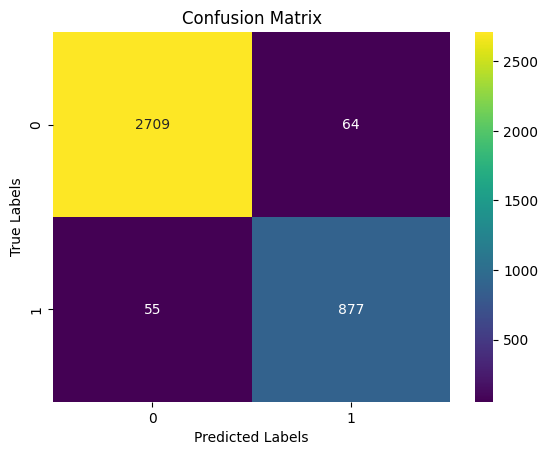

In [ ]:
# Visualizing the confusion matrix with a Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Loading the Test Dataset**

In [ ]:
# Loading the Test Dataset
test = pd.read_csv('test.csv')
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [ ]:
#Checking for missing values in the Test Dataset
test.isnull().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [ ]:
# Separating and listing numerical and categorical columns
num_test = []
cat_test = []
for col in test.columns:
    if test[col].dtype == 'object':
        cat_test.append(col)
    else:
        num_test.append(col)

print('Numerical columns', num_test)
print('Categorical columns', cat_test)

Numerical columns ['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical columns ['Stage_fear', 'Drained_after_socializing']


In [ ]:
# Checking skewness of numerical features
df[num_test].skew()

,0
id,0.000000
Time_spent_Alone,1.227359
Social_event_attendance,-0.236906
Going_outside,-0.382673
Friends_circle_size,-0.053346
Post_frequency,-0.060818


In [ ]:
# Imputing Missing Values
test['Time_spent_Alone'].fillna(test['Time_spent_Alone'].median(), inplace=True)

test['Social_event_attendance'].fillna(test['Social_event_attendance'].mean(), inplace=True)
test['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
test['Friends_circle_size'].fillna(test['Friends_circle_size'].mean(), inplace=True)
test['Post_frequency'].fillna(test['Post_frequency'].mean(), inplace=True)

test['Stage_fear'].fillna(test['Stage_fear'].mode()[0], inplace=True)
test['Drained_after_socializing'].fillna(test['Drained_after_socializing'].mode()[0], inplace=True)

In [ ]:
# Encoding categorical variables as numerical codes
test['Stage_fear'] = test['Stage_fear'].astype('category').cat.codes
test['Drained_after_socializing'] = test['Drained_after_socializing'].astype('category').cat.codes

In [ ]:
# Setting id as index
test.set_index('id', inplace=True)
test.tail(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,
24694,3.0,0,5.0,5.0,0,9.0,6.0
24695,8.0,1,2.0,1.0,1,0.0,0.0
24696,2.0,0,4.0,3.0,0,9.0,7.0
24697,3.0,0,4.0,4.0,0,11.0,9.0
24698,2.0,1,1.0,1.0,1,1.0,0.0


In [ ]:
# Generating the predictions for Test Dataset
personality = model.predict(test)

In [ ]:
#Creating a submission dataset
submission = pd.DataFrame({
    'Personality': personality
}, index=test.index)

submission.head(10)

,Personality
id,
18524,0
18525,1
18526,0
18527,0
18528,1
18529,0
18530,0
18531,1
18532,0


*Thank you for taking the time to review my code. I welcome any suggestions or feedback to help improve it...*